# Reading the data

In [73]:
import pandas as pd
dfb=pd.read_csv('Bronze.csv',sep=",",header=None)
print(dfb.head(3))
dfg=pd.read_csv('Gold.csv',header=None)
print(dfg.head(3))
dfp=pd.read_csv('Platinum.csv',header=None)
print(dfp.head(3))
dfs=pd.read_csv('Silver.csv',header=None)
print(dfs.head(3))
# dfa=pd.read_csv('Intel_ARK_ComparisonChart_2017_11_01.csv' ,header=None)
# print(dfa.head(3))

             0              1   \
0  CINT2006rate  Cisco Systems   
1  CINT2006rate  Cisco Systems   
2  CINT2006rate      Dell Inc.   

                                                  2   3   4   5     6   7   \
0  Cisco UCS C240 M5 (Intel Xeon Bronze 3104, 1.7...  12   2   6  1700  12   
1  Cisco UCS C240 M5 (Intel Xeon Bronze 3106, 1.7...  16   2   8  1700  16   
2  PowerEdge C6420 (Intel Xeon Bronze 3104, 1.70 ...  12   2   6  1700  12   

    8    9         10  
0  344  330  Oct-2017  
1  458  439  Oct-2017  
2  286  275  Aug-2017  
             0                  1                                     2   3   \
0  CINT2006rate  Acer Incorporated  Altos R360 F4 (Intel Xeon Gold 6126)  24   
1  CINT2006rate  Acer Incorporated  Altos R360 F4 (Intel Xeon Gold 6130)  32   
2  CINT2006rate  Acer Incorporated  Altos R360 F4 (Intel Xeon Gold 6134)  16   

   4   5     6   7     8     9         10  
0   2  12  2600  48  1360  1290  Oct-2017  
1   2  16  2100  64  1540  1450  Oct-2017  
2

# Cleaning the data

In [74]:
# dfb=dfb.drop(dfb.columns[[0]], axis=1)  
# print(dfb.head(3))
# dfs=dfs.drop(dfs.columns[[0]], axis=1)  
# print(dfs.head(3))
# dfg=dfg.drop(dfg.columns[[0]], axis=1)  
# print(dfg.head(3))
# dfp=dfp.drop(dfp.columns[[0]], axis=1)  
# print(dfp.head(3))

In [75]:
dfb.columns = ['benchmark', 'hardware_vendor','system','#_cores','#_chips','#_cores_per_chip','processor_mhz','base_copies','result','baseline','published']
dfs.columns = ['benchmark', 'hardware_vendor','system','#_cores','#_chips','#_cores_per_chip','processor_mhz','base_copies','result','baseline','published']
dfg.columns = ['benchmark', 'hardware_vendor','system','#_cores','#_chips','#_cores_per_chip','processor_mhz','base_copies','result','baseline','published']
dfp.columns = ['benchmark', 'hardware_vendor','system','#_cores','#_chips','#_cores_per_chip','processor_mhz','base_copies','result','baseline','published']
print(dfp.head(3))
dfb.to_csv('br.csv', sep='\t', encoding='utf-8')
dfs.to_csv('sl.csv', sep='\t', encoding='utf-8')
dfg.to_csv('go.csv', sep='\t', encoding='utf-8')
dfp.to_csv('pl.csv', sep='\t', encoding='utf-8')


      benchmark hardware_vendor  \
0  CINT2006rate   Cisco Systems   
1  CINT2006rate   Cisco Systems   
2  CINT2006rate   Cisco Systems   

                                              system  #_cores  #_chips  \
0  Cisco UCS B200 M5 (Intel Xeon Platinum 8153, 2...       32        2   
1  Cisco UCS B200 M5 (Intel Xeon Platinum 8156, 3...        8        2   
2  Cisco UCS B200 M5 (Intel Xeon Platinum 8160, 2...       48        2   

   #_cores_per_chip  processor_mhz  base_copies  result  baseline published  
0                16           2000           64    1420      1340  Sep-2017  
1                 4           3600           16     610       574  Oct-2017  
2                24           2100           96    2260      2160  Sep-2017  


# BRONZE

In [76]:
print("\n\n\n\n\t\t\t*******************BRONZE****************\n\n\n\n")

# df1=pd.DataFrame()
# df1['hardware_vendor_name']=(pd.Series(dfb.hardware_vendor.unique())).values
# df1['hardware_vendor_count']=(pd.Series(dfb.hardware_vendor.value_counts())).values
# df2=pd.DataFrame()
# df2['system']=(pd.Series(dfb.system.unique())).values
# df2['system_count']=(pd.Series(dfb.system.value_counts())).values
# print(df1,'\n','\n','\n',df2)
print('hardware vendors with their counts','\n')
print(dfb['hardware_vendor'].value_counts())
print('\n','systems with their counts','\n')
print(dfb['system'].value_counts())
b=dfb['system'].str.contains('Intel Xeon')
df=pd.DataFrame()
xeon=[]
df['Xeon?']=b.values
df['hardware_vendor']=(pd.Series(dfb.hardware_vendor).values)


for i in range(0,df['Xeon?'].count()):    
    if(df.iloc[i]['Xeon?']==True):
        xeon.append(df.iloc[i]['hardware_vendor'])
    
df=pd.DataFrame()
df['hardware_vendor']=(pd.Series(xeon)).values
df2=pd.DataFrame()
df2['hardware_vendor']=(pd.Series(df.hardware_vendor.unique())).values
print('\n','Vendors Using Intel Xeon','\n')
print(df2['hardware_vendor'])


a=[]
b=[]
c=[]
s=[]
a=dfb['system'].values
for i in range(0,dfb['system'].count()):
    b=a[i].replace("("," ").replace(")"," ").replace(","," ").split()
    if('Intel' in b):
        c.append(' '.join(b[(b.index('Intel')):(b.index('Intel')+4)]))
        s.append(' '.join(b[(b.index('Intel')):(b.index('Intel')+4)]))
df=pd.DataFrame()
df['series']=(pd.Series(c)).values
df2=pd.DataFrame()
df2['series']=(pd.Series(df.series.unique())).values
print('\n','Different series of processeor ','\n')
print(df2['series'])










			*******************BRONZE****************




hardware vendors with their counts 

Dell Inc.                   17
Lenovo Global Technology    13
Huawei                       6
Fujitsu                      2
Cisco Systems                2
Name: hardware_vendor, dtype: int64

 systems with their counts 

PowerEdge R740 (Intel Xeon Bronze 3104, 1.70 GHz)       2
PowerEdge C6420 (Intel Xeon Bronze 3106, 1.70 GHz)      2
PowerEdge C6420 (Intel Xeon Bronze 3104, 1.70 GHz)      2
PowerEdge R740 (Intel Xeon Bronze 3106, 1.70 GHz)       2
ThinkSystem SR530 (1.70 GHz, Intel Xeon Bronze 3106)    1
ThinkSystem SR550 (1.70 GHz, Intel Xeon Bronze 3106)    1
Huawei 1288H V5 (Intel Xeon Bronze 3106)                1
ThinkSystem ST550 (1.70 GHz, Intel Xeon Bronze 3104)    1
PowerEdge R540 (Intel Xeon Bronze 3106, 1.70 GHz)       1
ThinkSystem SD530 (1.70 GHz, Intel Xeon Bronze 3106)    1
ThinkSystem SR530 (1.70 GHz, Intel Xeon Bronze 3104)    1
Cisco UCS C240 M5 (Intel Xeon Bronze 3106, 1.70GHz)

# SILVER

In [77]:
print("\n\n\n\n\t\t\t*******************SILVER****************\n\n\n\n")


print('hardware vendors with their counts','\n')
print(dfs['hardware_vendor'].value_counts())
print('\n','systems with their counts','\n')
print(dfs['system'].value_counts())
# for i in dfs['system']:
#     print(i.str)
# print(dfs['system'].value_counts())
b=dfs['system'].str.contains('Intel Xeon')
df=pd.DataFrame()
xeon=[]
df['Xeon?']=b.values
df['hardware_vendor']=(pd.Series(dfs.hardware_vendor).values)


for i in range(0,df['Xeon?'].count()):    
    if(df.iloc[i]['Xeon?']==True):
        xeon.append(df.iloc[i]['hardware_vendor'])

df=pd.DataFrame()
df['hardware_vendor']=(pd.Series(xeon)).values
df2=pd.DataFrame()
df2['hardware_vendor']=(pd.Series(df.hardware_vendor.unique())).values
print('\n','Vendors Using Intel Xeon','\n')
print(df2['hardware_vendor'])


a=[]
b=[]
c=[]
a=dfs['system'].values
for i in range(0,dfs['system'].count()):
    b=a[i].replace("("," ").replace(")"," ").replace(","," ").split()
    if('Intel' in b):
        c.append(' '.join(b[(b.index('Intel')):(b.index('Intel')+4)]))
        s.append(' '.join(b[(b.index('Intel')):(b.index('Intel')+4)]))
   
df=pd.DataFrame()
df['series']=(pd.Series(c)).values
df2=pd.DataFrame()
df2['series']=(pd.Series(df.series.unique())).values
print('\n','Different series of processeor ','\n')
print(df2['series'])







			*******************SILVER****************




hardware vendors with their counts 

Lenovo Global Technology    42
Dell Inc.                   36
Huawei                      18
Cisco Systems                6
Fujitsu                      5
M Computers s.r.o.           2
Name: hardware_vendor, dtype: int64

 systems with their counts 

PowerEdge C6420 (Intel Xeon Silver 4114, 2.20 GHz)       2
PowerEdge R740 (Intel Xeon Silver 4116, 2.10 GHz)        2
Huawei 1288H V5 (Intel Xeon Silver 4116)                 2
Huawei 2288H V5 (Intel Xeon Silver 4116)                 2
PowerEdge R740 (Intel Xeon Silver 4112, 2.60 GHz)        2
PowerEdge C6420 (Intel Xeon Silver 4108, 1.80 GHz)       2
Huawei CH121 V5 (Intel Xeon Silver 4116)                 2
ThinkSystem SR650 (2.20 GHz, Intel Xeon Silver 4114)     1
Cisco UCS C240 M5 (Intel Xeon Silver 4110, 2.10GHz)      1
ThinkSystem SR630 (2.60 GHz, Intel Xeon Silver 4112)     1
PowerEdge M640 (Intel Xeon Silver 4116, 2.10 GHz)        1
PowerEdge

# GOLD

In [79]:


print("\n\n\n\n\t\t\t*******************GOLD****************\n\n\n\n")


print('hardware vendors with their counts','\n')
print(dfg['hardware_vendor'].value_counts())
print('\n','systems with their counts','\n')
print(dfg['system'].value_counts())
b=dfg['system'].str.contains('Intel Xeon')
df=pd.DataFrame()
xeon=[]
df['Xeon?']=b.values
df['hardware_vendor']=(pd.Series(dfg.hardware_vendor).values)


for i in range(0,df['Xeon?'].count()):    
    if(df.iloc[i]['Xeon?']==True):
        xeon.append(df.iloc[i]['hardware_vendor'])

df=pd.DataFrame()
df['hardware_vendor']=(pd.Series(xeon)).values
df2=pd.DataFrame()
df2['hardware_vendor']=(pd.Series(df.hardware_vendor.unique())).values
print('\n','Vendors Using Intel Xeon','\n')
print(df2['hardware_vendor'])


a=[]
b=[]
c=[]
a=dfg['system'].values
for i in range(0,dfg['system'].count()):
    b=a[i].replace("("," ").replace(")"," ").replace(","," ").split()
    if('Intel' in b):
        c.append(' '.join(b[(b.index('Intel')):(b.index('Intel')+4)]))
        s.append(' '.join(b[(b.index('Intel')):(b.index('Intel')+4)]))

df=pd.DataFrame()
df['series']=(pd.Series(c)).values
df2=pd.DataFrame()
df2['series']=(pd.Series(df.series.unique())).values
print('\n','Different series of processeor ','\n')
print(df2['series'])








			*******************GOLD****************




hardware vendors with their counts 

Lenovo Global Technology    134
Dell Inc.                   119
Huawei                       77
Cisco Systems                72
Acer Incorporated            25
Fujitsu                      19
Supermicro                    3
H3C                           2
Name: hardware_vendor, dtype: int64

 systems with their counts 

PowerEdge C6420 (Intel Xeon Gold 5122, 3.60 GHz)       3
Altos W2000h-W370h F4 (Intel Xeon Gold 6138)           3
ThinkSystem SD530 (2.10 GHz, Intel Xeon Gold 6130T)    2
PowerEdge C6420 (Intel Xeon Gold 6150, 2.70 GHz)       2
Huawei 1288H V5 (Intel Xeon Gold 5120)                 2
PowerEdge C6420 (Intel Xeon Gold 5120, 2.20 GHz)       2
PowerEdge R740 (Intel Xeon Gold 5122, 3.60 GHz)        2
PowerEdge C6420 (Intel Xeon Gold 6142, 2.60 GHz)       2
Huawei 2288H V5 (Intel Xeon Gold 5115)                 2
Huawei CH121 V5 (Intel Xeon Gold 5120)                 2
PowerEdge R740 (Inte

# PLATINUM

In [80]:
print("\n\n\n\n\t\t\t*******************PLATINUM****************\n\n\n\n")


print('hardware vendors with their counts','\n')
print(dfp['hardware_vendor'].value_counts())
print('\n','systems with their counts','\n')
print(dfp['system'].value_counts())
b=dfp['system'].str.contains('Intel Xeon')
df=pd.DataFrame()
xeon=[]
df['Xeon?']=b.values
df['hardware_vendor']=(pd.Series(dfp.hardware_vendor).values)


for i in range(0,df['Xeon?'].count()):    
    if(df.iloc[i]['Xeon?']==True):
        xeon.append(df.iloc[i]['hardware_vendor'])

df=pd.DataFrame()
df['hardware_vendor']=(pd.Series(xeon)).values
df2=pd.DataFrame()
df2['hardware_vendor']=(pd.Series(df.hardware_vendor.unique())).values
print('\n','Vendors Using Intel Xeon','\n')
print(df2['hardware_vendor'])


a=[]
b=[]
c=[]
a=dfp['system'].values
for i in range(0,dfp['system'].count()):
    b=a[i].replace("("," ").replace(")"," ").replace(","," ").split()
    if('Intel' in b):
        c.append(' '.join(b[(b.index('Intel')):(b.index('Intel')+4)]))
        s.append(' '.join(b[(b.index('Intel')):(b.index('Intel')+4)]))
    

df=pd.DataFrame()
df['series']=(pd.Series(c)).values
df2=pd.DataFrame()
df2['series']=(pd.Series(df.series.unique())).values
print('\n','Different series of processeor ','\n')
print(df2['series'])





			*******************PLATINUM****************




hardware vendors with their counts 

Lenovo Global Technology      70
Cisco Systems                 45
Dell Inc.                     38
Huawei                        30
Fujitsu                       11
H3C                            3
Supermicro                     2
Hewlett Packard Enterprise     2
Nokia                          1
Name: hardware_vendor, dtype: int64

 systems with their counts 

PowerEdge C6420 (Intel Xeon Platinum 8168, 2.70 GHz)         3
PowerEdge R740 (Intel Xeon Platinum 8164, 2.00 GHz)          2
ThinkSystem SR950 (3.60 GHz, Intel Xeon Platinum 8156)       2
ThinkSystem SR650 (2.50 GHz, Intel Xeon Platinum 8180)       2
H3C UniServer R4900 G3 (Intel Xeon Platinum 8164)            2
ThinkSystem SR950 (2.50 GHz, Intel Xeon Platinum 8180)       2
ThinkSystem SR950 (2.10 GHz, Intel Xeon Platinum 8160M)      2
ThinkSystem SR950 (2.00 GHz, Intel Xeon Platinum 8164)       2
ThinkSystem SR950 (3.00 GHz, Intel Xeon P

### Most used series

In [81]:
df=pd.DataFrame()
df['series']=(pd.Series(s)).values
print(df['series'].value_counts())

Intel Xeon Gold 6138         29
Intel Xeon Gold 6126         29
Intel Xeon Gold 5122         28
Intel Xeon Gold 5120         28
Intel Xeon Gold 5118         28
Intel Xeon Gold 6130         26
Intel Xeon Platinum 8180     25
Intel Xeon Gold 5115         25
Intel Xeon Platinum 8176     24
Intel Xeon Gold 6148         23
Intel Xeon Platinum 8164     23
Intel Xeon Gold 6136         23
Intel Xeon Gold 6152         22
Intel Xeon Silver 4116       22
Intel Xeon Bronze 3106       22
Intel Xeon Gold 6150         22
Intel Xeon Gold 6140         22
Intel Xeon Gold 6142         21
Intel Xeon Platinum 8170     21
Intel Xeon Platinum 8153     21
Intel Xeon Platinum 8156     21
Intel Xeon Platinum 8160     19
Intel Xeon Silver 4114       19
Intel Xeon Silver 4112       19
Intel Xeon Gold 6134         19
Intel Xeon Platinum 8168     18
Intel Xeon Silver 4108       18
Intel Xeon Bronze 3104       18
Intel Xeon Silver 4110       17
Intel Xeon Gold 6154         14
Intel Xeon Gold 6132         13
Intel Xe

# Plotting graphs

In [82]:
from matplotlib import pyplot as plt
#%matplotlib inline
import seaborn as sns

### BAR GRAPH ( Hardware Vendor count )

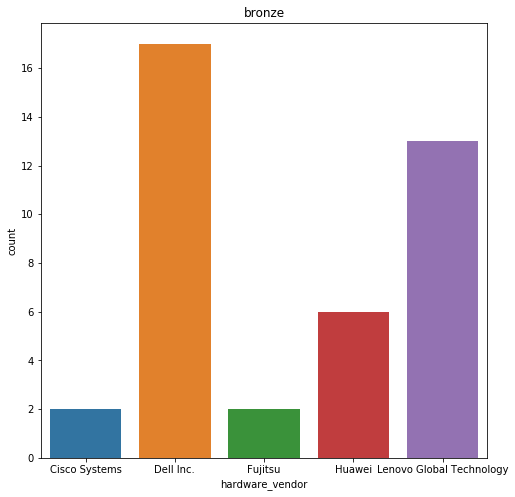

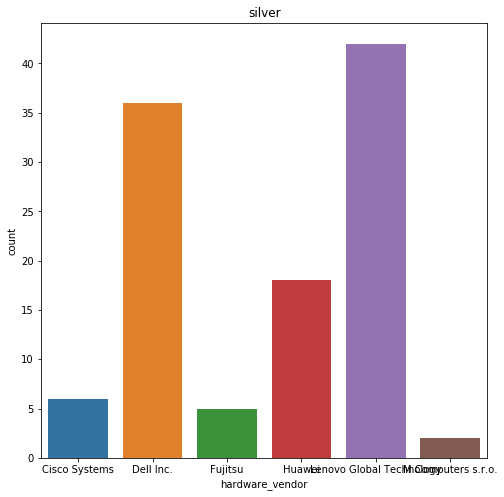

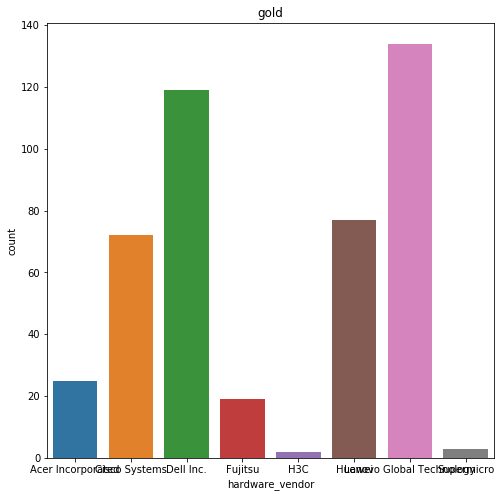

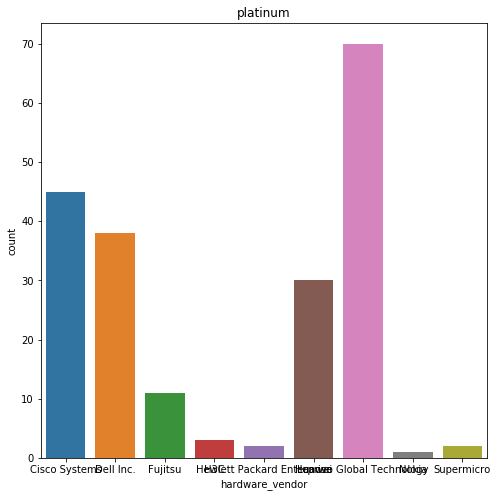

In [83]:
plt.subplots(figsize=(8,8))
sns.countplot(x='hardware_vendor',data=dfb)
plt.title('bronze')
plt.show()

plt.subplots(figsize=(8,8))
sns.countplot(x='hardware_vendor',data=dfs)
plt.title('silver')
plt.show()

plt.subplots(figsize=(8,8))
sns.countplot(x='hardware_vendor',data=dfg)
plt.title('gold')
plt.show()

plt.subplots(figsize=(8,8))
sns.countplot(x='hardware_vendor',data=dfp)
plt.title('platinum')
plt.show()

In [ ]:
plt.subplots(figsize=(100,8))
sns.countplot(x='system',data=dfb)
plt.title('bronze')
plt.show()
# plt.savefig('bronze_system_count.pdf')

plt.subplots(figsize=(100,8))
sns.countplot(x='system',data=dfs)
plt.title('silver')
plt.show()
# plt.savefig('bronze_system_count.pdf')

plt.subplots(figsize=(100,8))
sns.countplot(x='system',data=dfg)
plt.title('gold')
plt.show()
# plt.savefig('bronze_system_count.pdf')

plt.subplots(figsize=(100,8))
sns.countplot(x='system',data=dfp)
plt.title('platinum')
plt.show()
# plt.savefig('bronze_system_count.pdf')


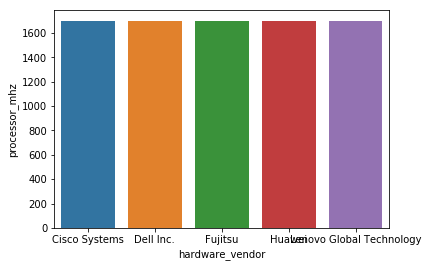

In [84]:
sns.barplot(x='hardware_vendor',y='processor_mhz',data=dfb)
plt.show()